## 🕶 All You Need is Time-Series Visualization

![](https://images.unsplash.com/photo-1518186285589-2f7649de83e0?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1267&q=80)

Example code and explanations of more than 20 techniques for visualizing time series data.

I will continue to update the content further.

### Table of Contents

- **1. Bar**
    - single 
        - vertical [1]
        - horizontal [2]
    - multiple
        - subplots [3]
        - overlaped [4]
        - stacked 
            - amount [5]
            - ratio [6]
        - adjacent [7]
        
    
- **2. Line**
    - single 
        - line [8]
        - area [9]
        - step [10]
        - step area [11]
    - multiple 
        - subplots [12]
        - horizon chart [13]
        - overlaped [14]
        - overlaped area [15]
        - stacked
            - amount [16]
            - streamgraph[17]
            - ratio [18]
        

In [1]:
!pip install seaborn==0.11.0

     |████████████████████████████████| 283 kB 422 kB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
sns.color_palette(["#00798c", "#d1495b", '#edae49', '#66a182'])

[(0.0, 0.4745098039215686, 0.5490196078431373),
 (0.8196078431372549, 0.28627450980392155, 0.3568627450980392),
 (0.9294117647058824, 0.6823529411764706, 0.28627450980392155),
 (0.4, 0.6313725490196078, 0.5098039215686274)]

In [4]:
pd.options.display.max_columns = 999

In [5]:
data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


## 1. Bar

### Bar > Single > Vertical 

The most basic is a **bar** graph. 

Bars are easy to make absolute comparisons of their size, and ratios are easy to compare to nearby bars.

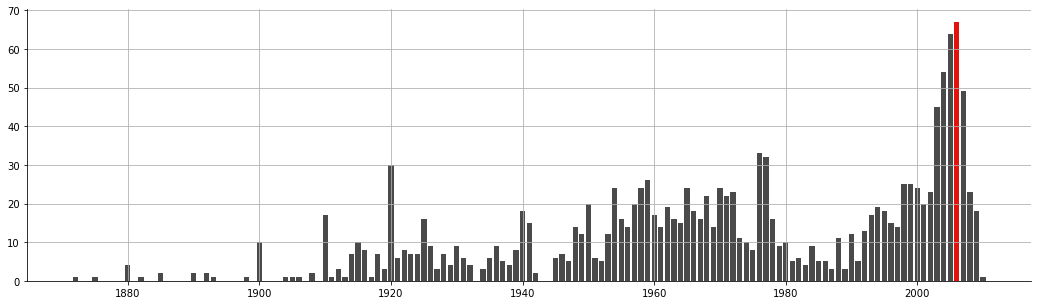

In [7]:
built = data['YearBuilt'].value_counts().sort_index()
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
color = ['#4a4a4a' if val != max(built) else '#e3120b' for val in built]
ax.bar(built.index, built, color=color)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid()

plt.show()

### Bar > Single > Horizontal

On the web or in publications, the height is longer than the width.

If there is a large amount, it is also a technique to draw the bar graph by changing its axis.

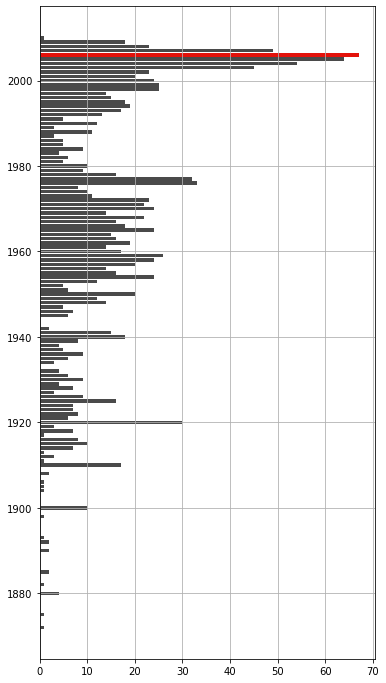

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 12))
ax.barh(built.index, built, color=color)
ax.grid()

plt.show()

### Bar > Multiple > Subplots

The first way to compare multiple graphs over the same time period is to draw multiple graphs.

In [9]:
data['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [10]:
data['HouseStyle'] = data['HouseStyle'].apply(lambda x : 'ETC' if x in ['SLvl', 'SFoyer', '1.5Unf', '2.5Unf', '2.5Fin'] else x)

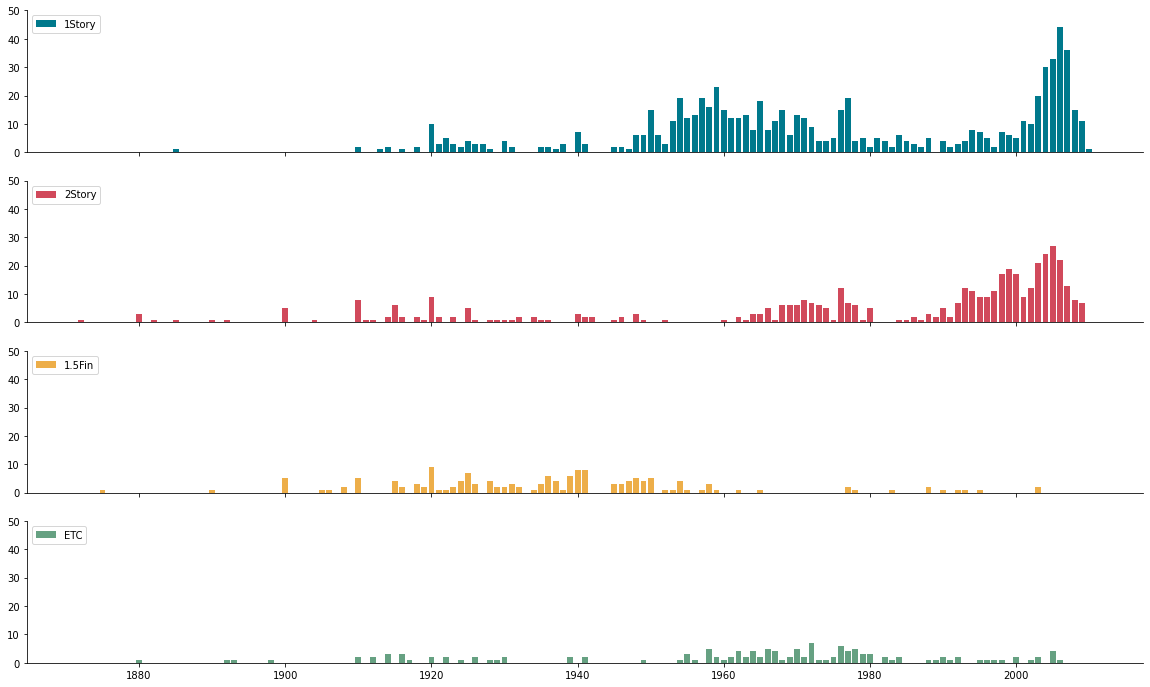

In [11]:
fig, ax = plt.subplots(4, 1, figsize=(20, 12), sharex=True)
color = ["#00798c", "#d1495b", '#edae49', '#66a182']

for i, hs in enumerate(data['HouseStyle'].value_counts().index):
    hs_built = data[data['HouseStyle']==hs]['YearBuilt'].value_counts()
    ax[i].bar(hs_built.index, hs_built, color=color[i], label=hs)
    ax[i].set_ylim(0, 50)
    ax[i].legend(loc='upper left')
    for s in ['top', 'right']:
        ax[i].spines[s].set_visible(False)



plt.show()

### Bar > Multiple > Overlaped

If you draw multiple graphs, absolute comparison is difficult, so you can draw them on one graph at the same time.

If you draw at the same time, you have to deal with the overlap.

The first is to adjust the transparency so that the overlapping part is visible.

Comparisons are much easier.

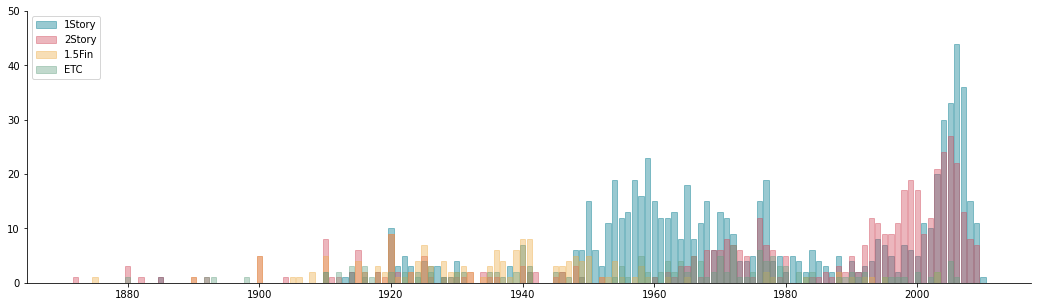

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
color = ["#00798c", "#d1495b", '#edae49', '#66a182']

for i, hs in enumerate(data['HouseStyle'].value_counts().index):
    hs_built = data[data['HouseStyle']==hs]['YearBuilt'].value_counts()
    ax.bar(hs_built.index, hs_built, color=color[i], label=hs, alpha=0.4, edgecolor=color[i])
    
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylim(0, 50)
ax.legend(loc='upper left')
plt.show()

### Bar > Multiple > Stacked > Amout

Another way to draw at the same time is to stack the bars.

In [13]:
data_sub = data.groupby('HouseStyle')['YearBuilt'].value_counts().unstack().fillna(0).loc[['ETC','1.5Fin','2Story', '1Story']].cumsum(axis=0).T
data_sub

HouseStyle,ETC,1.5Fin,2Story,1Story
YearBuilt,,,,
1872,0.0,0.0,1.0,1.0
1875,0.0,1.0,1.0,1.0
1880,1.0,1.0,4.0,4.0
1882,0.0,0.0,1.0,1.0
1885,0.0,0.0,1.0,2.0
...,...,...,...,...
2006,1.0,1.0,23.0,67.0
2007,0.0,0.0,13.0,49.0
2008,0.0,0.0,8.0,23.0


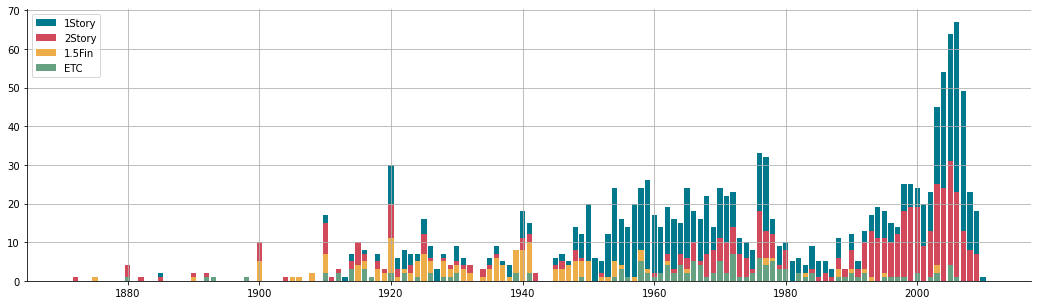

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
color = ["#00798c", "#d1495b", '#edae49', '#66a182']

for i, hs in enumerate(data['HouseStyle'].value_counts().index):
    hs_built = data_sub[hs]
    ax.bar(hs_built.index, hs_built, color=color[i], label=hs)
    
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.legend(loc='upper left')
ax.grid()
plt.show()

### Bar > Multiple > Stacked > Ratio

You can also visualize the proportions of that bar over time.

In [15]:
data_sub = data.groupby('HouseStyle')['YearBuilt'].value_counts().unstack().fillna(0).loc[['ETC','1.5Fin','2Story', '1Story']].T
data_sum = data_sub.sum(axis=1)
data_sub = (data_sub.T / data_sum).cumsum().T

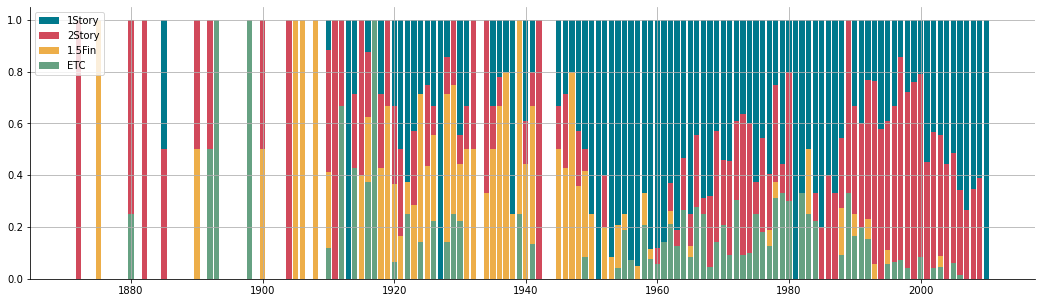

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
color = ["#00798c", "#d1495b", '#edae49', '#66a182']

for i, hs in enumerate(data['HouseStyle'].value_counts().index):
    hs_built = data_sub[hs]
    ax.bar(hs_built.index, hs_built, color=color[i], label=hs)
    
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.legend(loc='upper left')
ax.grid()
plt.show()

### Bar > Multiple > Adjacent

You can also draw using neighboring bars for a specific time period. 

However, this is not a good idea for time series, and line charts are more efficient than doing this.

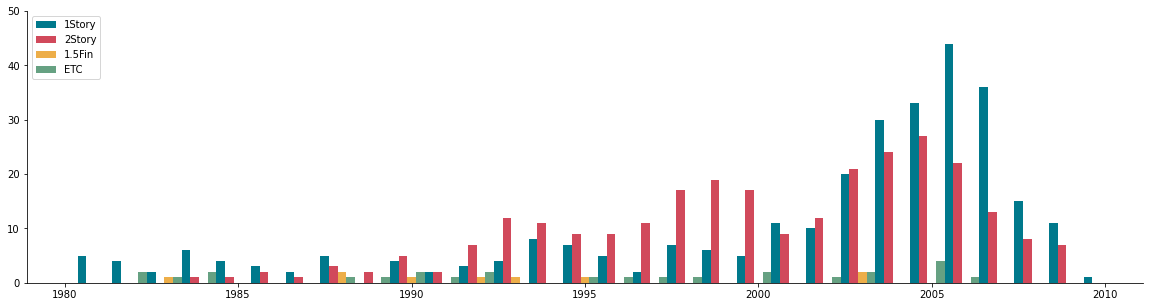

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
color = ["#00798c", "#d1495b", '#edae49', '#66a182']

width = 0.25
for i, hs in enumerate(data['HouseStyle'].value_counts().index):
    hs_built = data[(data['HouseStyle']==hs)&(data['YearBuilt']>1980)]['YearBuilt'].value_counts()
    ax.bar(hs_built.index+(width*(i-2)), hs_built, width, color=color[i], label=hs)
    
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylim(0, 50)
ax.legend(loc='upper left')
plt.show()

## 2. Line

### Line > Single > Normal

For time series, line graphs are more efficient than bar graphs.

It shows trends and can emphasize a continuous feeling.

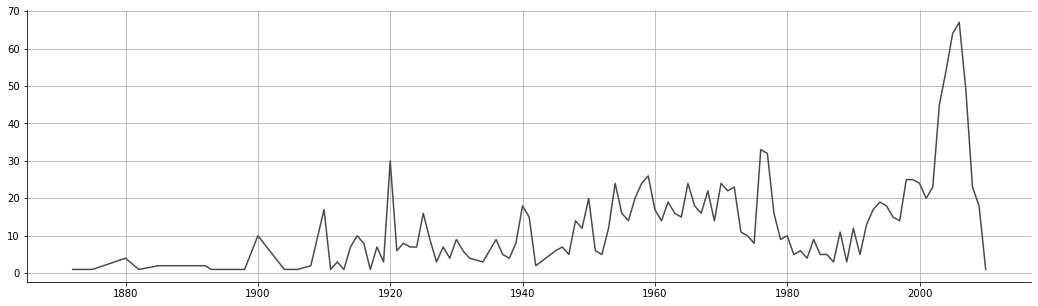

In [18]:
built = data['YearBuilt'].value_counts().sort_index()
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.plot(built.index, built, color='#4a4a4a')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid()

plt.show()

### Line > Single > Area

It is also a good idea to plot the area based on what the time series represents.

Area can represent trends and quantities.

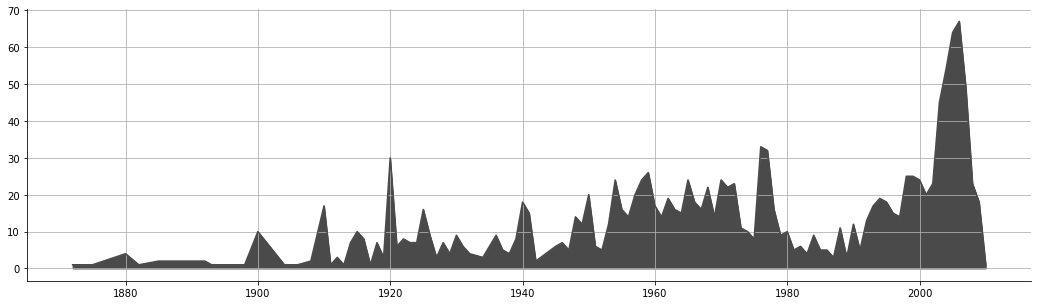

In [19]:
built = data['YearBuilt'].value_counts().sort_index()
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
ax.plot(built.index, built, color='#4a4a4a')

ax.fill_between(built.index, 0, built, color='#4a4a4a')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid()

plt.show()

### Line > Single > Step

Among the line graphs, the shape of the line can also be stepped.

It is easier to understand for comparisons of absolute quantities and avoids cognitive misunderstandings due to gradients.

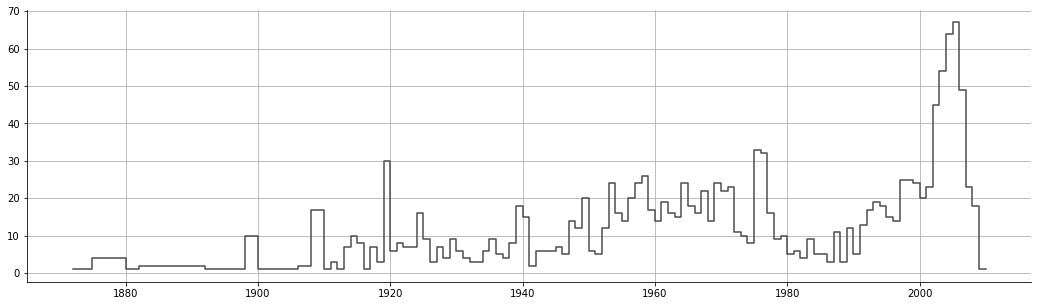

In [20]:
built = data['YearBuilt'].value_counts().sort_index()
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
ax.step(built.index, built, color='#4a4a4a')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid()

plt.show()

### Line > Single > Step Area 

You can plot this as an area graph.

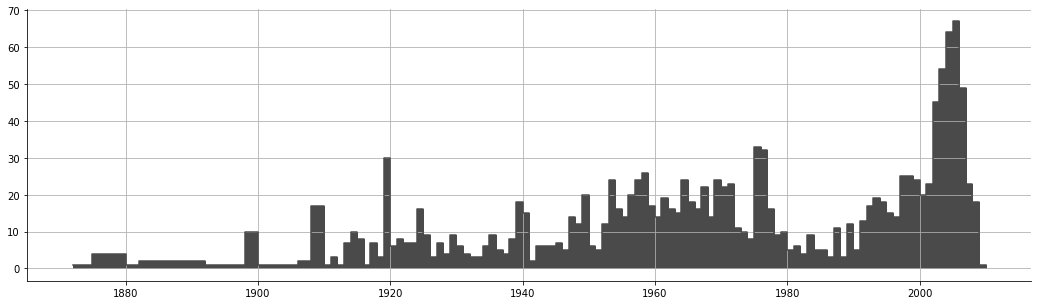

In [21]:
built = data['YearBuilt'].value_counts().sort_index()
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
ax.step(built.index, built, color='#4a4a4a')

ax.fill_between(built.index, 0, built, color='#4a4a4a', step='pre')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid()

plt.show()

Looks like building..?

### Line > Multiple > Subplots

When drawing multiple graphs at the same time, pay attention to the axis scale.

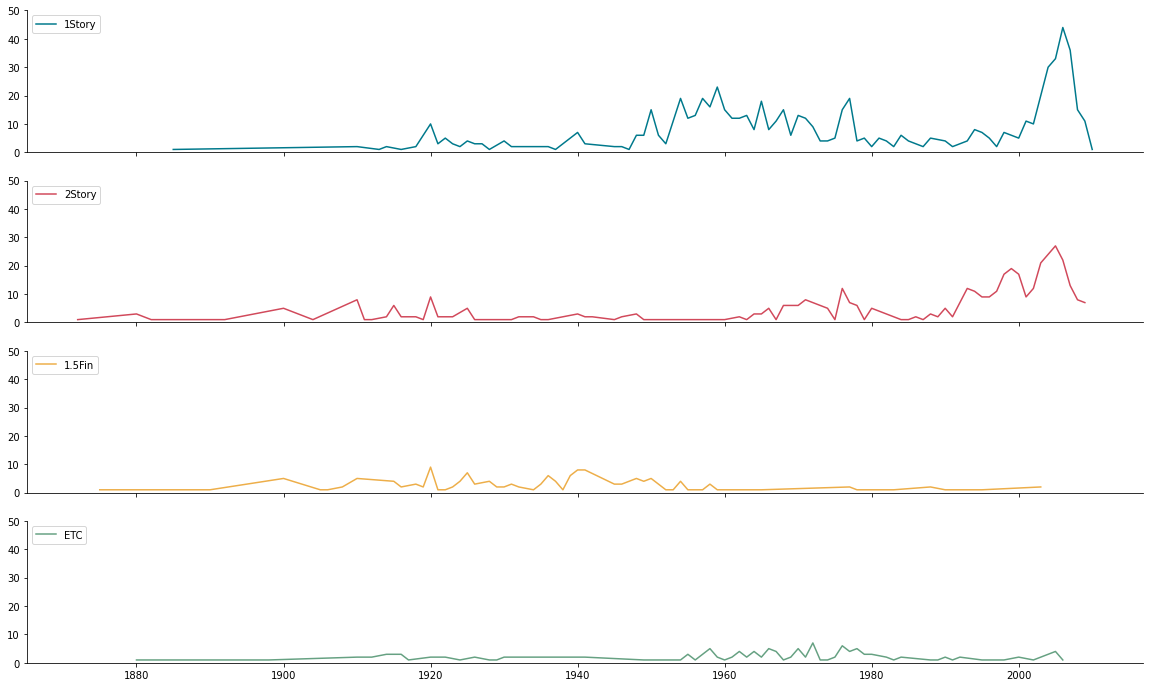

In [22]:
fig, ax = plt.subplots(4, 1, figsize=(20, 12), sharex=True)
color = ["#00798c", "#d1495b", '#edae49', '#66a182']

for i, hs in enumerate(data['HouseStyle'].value_counts().index):
    hs_built = data[data['HouseStyle']==hs]['YearBuilt'].value_counts().sort_index()
    ax[i].plot(hs_built.index, hs_built, color=color[i], label=hs)
    ax[i].set_ylim(0, 50)
    ax[i].legend(loc='upper left')
    for s in ['top', 'right']:
        ax[i].spines[s].set_visible(False)



plt.show()

### Line > Multiple > Horizon Chart

If you draw this as an area graph and draw it closer together, you can visualize a sophisticated time series.

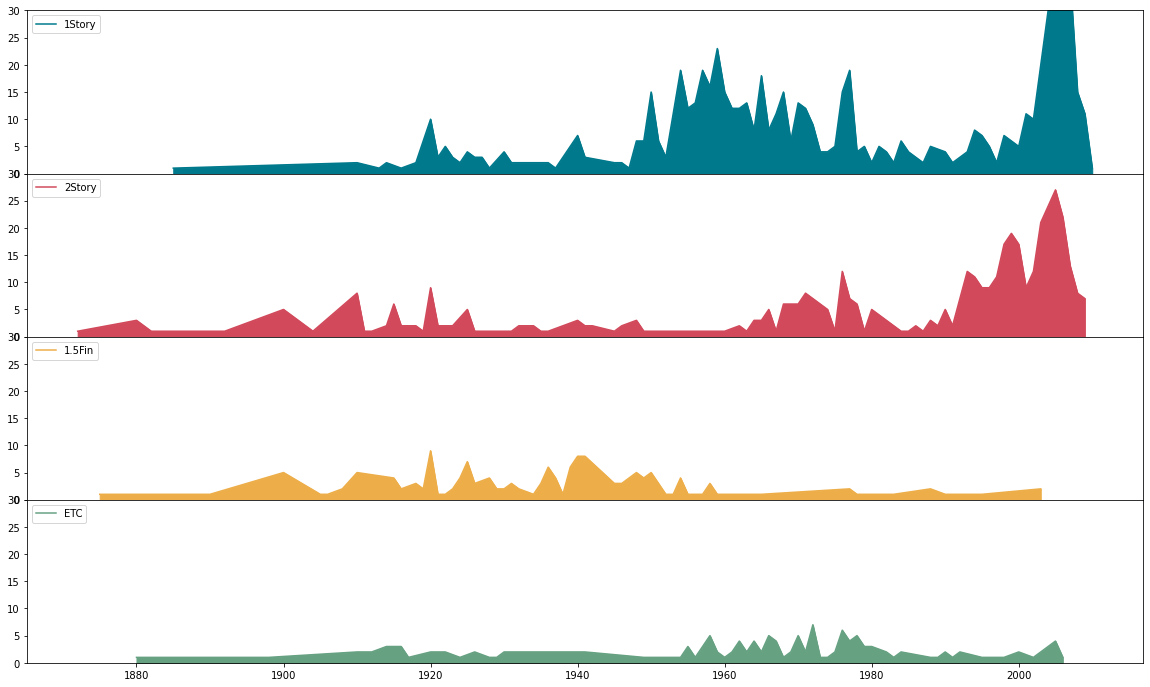

In [23]:
fig, ax = plt.subplots(4, 1, figsize=(20, 12), sharex=True)
color = ["#00798c", "#d1495b", '#edae49', '#66a182']

for i, hs in enumerate(data['HouseStyle'].value_counts().index):
    hs_built = data[data['HouseStyle']==hs]['YearBuilt'].value_counts().sort_index()
    ax[i].plot(hs_built.index, hs_built, color=color[i], label=hs)
    ax[i].fill_between(hs_built.index, 0, hs_built, color=color[i])
    ax[i].set_ylim(0, 30)
    ax[i].legend(loc='upper left')

plt.subplots_adjust(hspace=0)
plt.show()

### Line > Multiple > Overlaped

Unlike bar charts, drawing at the same time is very efficient. 

Since it is a line, there is no need to handle most of the overlapping parts.

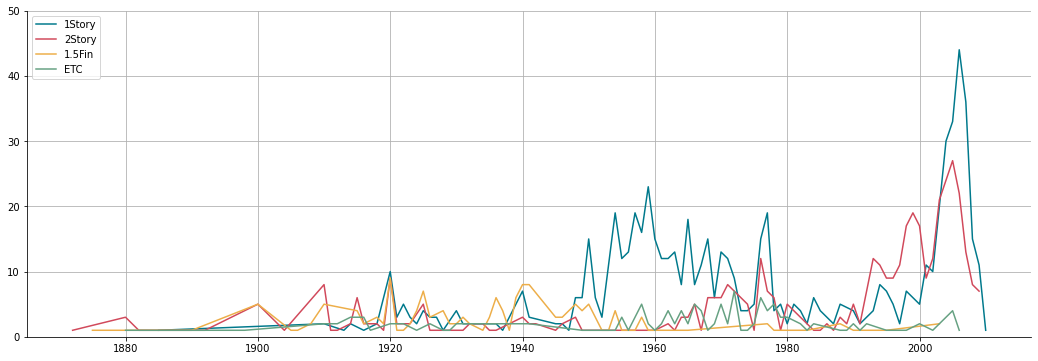

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
color = ["#00798c", "#d1495b", '#edae49', '#66a182']

for i, hs in enumerate(data['HouseStyle'].value_counts().index):
    hs_built = data[data['HouseStyle']==hs]['YearBuilt'].value_counts().sort_index()
    ax.plot(hs_built.index, hs_built, color=color[i], label=hs)

ax.set_ylim(0, 50)
ax.legend(loc='upper left')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid()

plt.show()

you can custom linestyle.

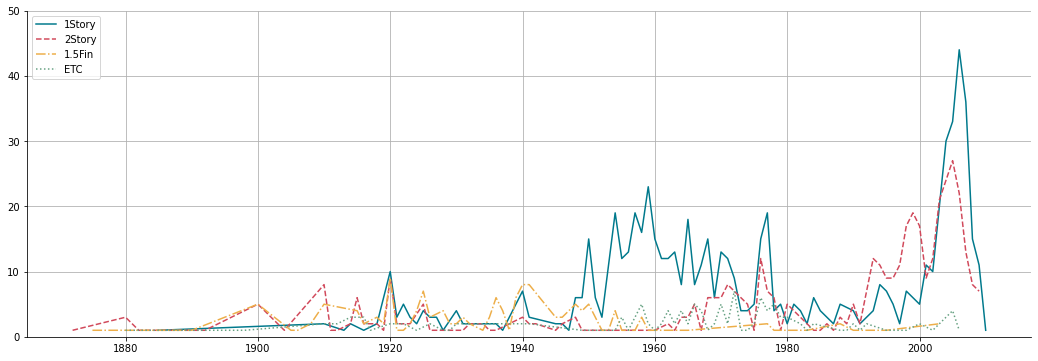

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
color = ["#00798c", "#d1495b", '#edae49', '#66a182']
linestyles = ['-', '--', '-.', ':']

for i, hs in enumerate(data['HouseStyle'].value_counts().index):
    hs_built = data[data['HouseStyle']==hs]['YearBuilt'].value_counts().sort_index()
    ax.plot(hs_built.index, hs_built, color=color[i], linestyle=linestyles[i], label=hs)

ax.set_ylim(0, 50)
ax.legend(loc='upper left')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid()

plt.show()

### Line > Multiple > Overlaped Area

You can plot this as an area graph.

It is effective because it can be difficult to express the total amount with only the line.

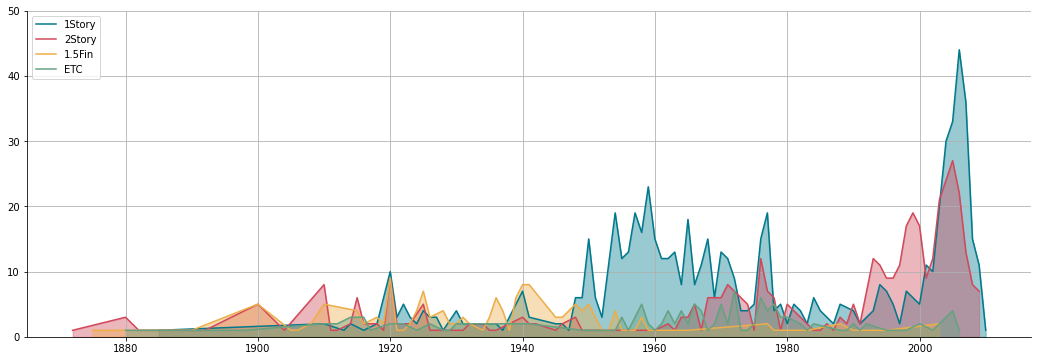

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
color = ["#00798c", "#d1495b", '#edae49', '#66a182']

for i, hs in enumerate(data['HouseStyle'].value_counts().index):
    hs_built = data[data['HouseStyle']==hs]['YearBuilt'].value_counts().sort_index()
    ax.plot(hs_built.index, hs_built, color=color[i], label=hs)
    ax.fill_between(hs_built.index, 0, hs_built, color=color[i], alpha=0.4)

ax.set_ylim(0, 50)
ax.legend(loc='upper left')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid()

plt.show()

### Line > Multiple > Stacked > Amout

Stacking method is also possible.

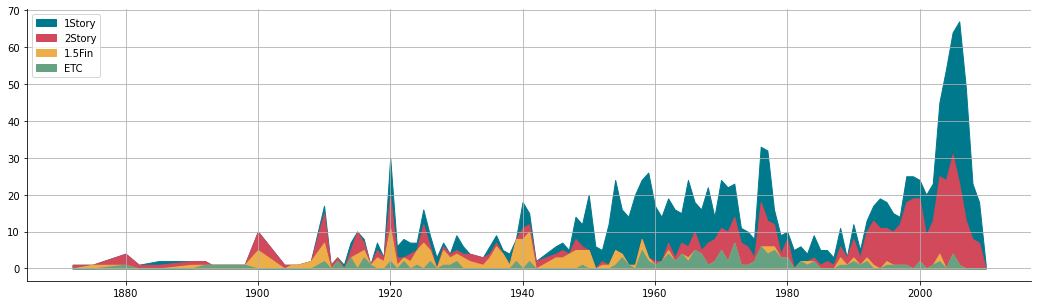

In [27]:
data_sub = data.groupby('HouseStyle')['YearBuilt'].value_counts().unstack().fillna(0).loc[['ETC','1.5Fin','2Story', '1Story']].cumsum(axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(18, 5))
color = ["#00798c", "#d1495b", '#edae49', '#66a182']

for i, hs in enumerate(data['HouseStyle'].value_counts().index):
    hs_built = data_sub[hs]
    ax.fill_between(hs_built.index, 0, hs_built, color=color[i], label=hs)
    
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.legend(loc='upper left')
ax.grid()
plt.show()

### Line > Multiple > Stacked > Stream graph

A streamgraph, or stream graph, is a type of stacked area graph which is displaced around a central axis, resulting in a flowing, organic shape.

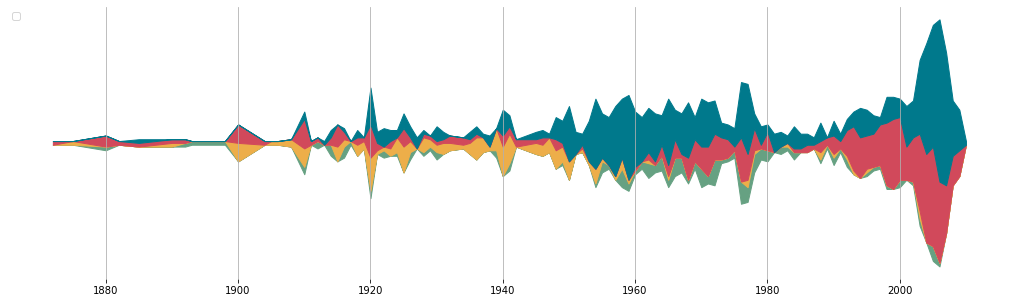

In [28]:
data_sub = data.groupby('HouseStyle')['YearBuilt'].value_counts().unstack().fillna(0).loc[['ETC','1.5Fin','2Story', '1Story']].cumsum(axis=0).T
data_sub.insert(0, "base", np.zeros(len(data_sub)))


data_sub = data_sub.add(-data['YearBuilt'].value_counts()/2, axis=0)
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
color = ["#00798c", "#d1495b", '#edae49', '#66a182'][::-1]
hs_list = data_sub.columns


for i, hs in enumerate(hs_list):
    if i == 0 : continue
    ax.fill_between(hs_built.index, data_sub.iloc[:,i-1], data_sub.iloc[:,i], color=color[i-1])
    
for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)

ax.set_yticks([])
ax.legend(loc='upper left')
ax.grid(axis='x')
plt.show()

### Line > Multiple > Stacked > Ratio

Stacking according to each proportion is also one of the famous techniques.

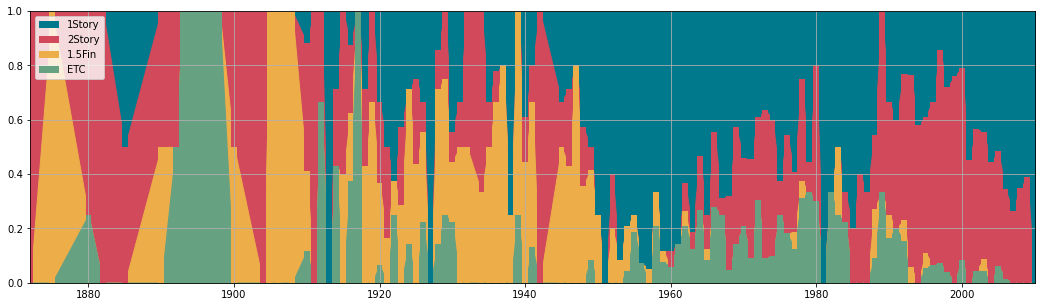

In [29]:
data_sub = data.groupby('HouseStyle')['YearBuilt'].value_counts().unstack().fillna(0).loc[['ETC','1.5Fin','2Story', '1Story']].T
data_sum = data_sub.sum(axis=1)
data_sub = (data_sub.T / data_sum).cumsum().T

fig, ax = plt.subplots(1, 1, figsize=(18, 5))
color = ["#00798c", "#d1495b", '#edae49', '#66a182']

for i, hs in enumerate(data['HouseStyle'].value_counts().index):
    hs_built = data_sub[hs]
    ax.bar(hs_built.index, hs_built, color=color[i], label=hs)
    ax.fill_between(hs_built.index, 0, hs_built, color=color[i])
    
ax.legend(loc='upper left')
ax.grid()
ax.set_ylim(0, 1)
ax.set_xlim(1872, 2010)
plt.show()

## Related Work

- [🕶 Awesome Visualization with Titanic Dataset📊](https://www.kaggle.com/subinium/awesome-visualization-with-titanic-dataset)
- [Tips for making the Right Visualization](https://www.kaggle.com/subinium/tips-for-making-the-right-visualization)
- [Simple Matplotlib & Visualization Tips 💡](https://www.kaggle.com/subinium/simple-matplotlib-visualization-tips)
- [🛣️ Road to Viz Expert (1) - Unusual tools](https://www.kaggle.com/subinium/road-to-viz-expert-1-unusual-tools)